In [1]:
import pandas as pd
import geohash as gh
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import psutil
import os

In [2]:
# task 1.1
taxi = pd.read_csv('taxi_train.csv', sep=',', nrows= 1000, parse_dates=['pickup_datetime'])

In [3]:
# task 1.2
decoded_pickup_geohash = taxi['pickup_geohash'].map(lambda x: [float(y) for y in gh.decode(x)])
decoded_dropoff_geohash = taxi['dropoff_geohash'].map(lambda x: [float(y) for y in gh.decode(x)])

In [4]:
# task 1.2.1
taxi['pickup_x'] = decoded_pickup_geohash.map(lambda x: x[0])
taxi['pickup_y'] = decoded_pickup_geohash.map(lambda x: x[1])
taxi['dropoff_x'] = decoded_dropoff_geohash.map(lambda x: x[0])
taxi['dropoff_y'] = decoded_dropoff_geohash.map(lambda x: x[1])

In [5]:
# task 1.3
taxi['distance'] = list(map(np.linalg.norm, [list(map(lambda x, y: np.subtract(x, y), pickup, dropoff)) for pickup, dropoff in zip(decoded_pickup_geohash, decoded_dropoff_geohash)]))

In [6]:
# task 1.4.1
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
pickup_datetime    1000 non-null datetime64[ns]
passenger          1000 non-null int64
pickup_geohash     1000 non-null object
dropoff_geohash    1000 non-null object
fare               1000 non-null float64
pickup_x           1000 non-null float64
pickup_y           1000 non-null float64
dropoff_x          1000 non-null float64
dropoff_y          1000 non-null float64
distance           1000 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 78.2+ KB


In [7]:
# task 1.4.2
taxi.head(10)

,pickup_datetime,passenger,pickup_geohash,dropoff_geohash,fare,pickup_x,pickup_y,dropoff_x,dropoff_y,distance
0,2009-06-15 17:26:21,1,dr5rxth4yu4c,dr5rxeqnjy8v,4.5,40.721319,-73.844311,40.712278,-73.841610,0.009436
1,2010-01-05 16:52:16,1,dr5reer0t0fm,dr72h81uqhe9,16.9,40.711303,-74.016048,40.782004,-73.979268,0.079696
2,2011-08-18 00:35:00,2,dr5rukr7t72n,dr5ru63jpp74,5.7,40.761270,-73.982738,40.750562,-73.991242,0.013674
3,2012-04-21 04:30:42,1,dr5rsrhpybjq,dr5ru7bcpe0c,7.7,40.733143,-73.987130,40.758092,-73.991567,0.025340
4,2010-03-09 07:51:00,1,dr5ruvd4f7wb,dr72j06qth30,5.3,40.768008,-73.968095,40.783762,-73.956655,0.019470
5,2011-01-06 09:50:45,1,dr5rsnfnuw1v,dr5ruey9ftmf,12.1,40.731630,-74.000964,40.758233,-73.972892,0.038675
6,2012-11-20 20:35:00,1,dr5rud97th2k,dr5rutjbmmr6,7.5,40.751662,-73.980002,40.764842,-73.973802,0.014565
7,2012-01-04 17:22:00,1,dr5rvnwq9f4p,dr5ru6d01cfq,16.5,40.774138,-73.951300,40.751048,-73.990095,0.045146
8,2012-12-03 13:10:00,1,dr5reyn4k3w6,dr5rsnzyumf1,9.0,40.726713,-74.006462,40.731628,-73.993078,0.014258
9,2009-09-02 01:11:00,2,dr5rsx2uj8r1,dr5ru7c125sg,8.9,40.733873,-73.980658,40.758138,-73.991540,0.026593


In [8]:
# task 1.5
# remove invalid geohash
taxi = taxi.drop(taxi[(taxi['pickup_geohash'] == '7zzzzzzzzzzz') | (taxi['dropoff_geohash'] == '7zzzzzzzzzzz')].index).reset_index(drop=True)

In [9]:
# update decoded geohash
decoded_pickup_geohash = taxi['pickup_geohash'].map(lambda x: [float(y) for y in gh.decode(x)])
decoded_dropoff_geohash = taxi['dropoff_geohash'].map(lambda x: [float(y) for y in gh.decode(x)])

In [10]:
# task 1.6
# count 
passenger_count = taxi['passenger'].count()
# mean
passenger_mean = taxi['passenger'].mean()
# standard derviation
passenger_std = taxi['passenger'].std()
# the earliest and latest pickup_time
pickup_datetime = taxi['pickup_datetime'].sort_values().reset_index(drop=True)
earliest_pickup_time = pickup_datetime[0]
latest_pickup_time = pickup_datetime[len(pickup_datetime)-1]

In [11]:
# task 1.7
taxi.index = taxi['pickup_datetime']
number_8amto9am = taxi.between_time('8:00', '9:00').shape[0]
number_1amto2am = taxi.between_time('1:00', '2:00').shape[0]

In [12]:
number_1amto2am

28

In [13]:
number_8amto9am

50

In [14]:
taxi

,pickup_datetime,passenger,pickup_geohash,dropoff_geohash,fare,pickup_x,pickup_y,dropoff_x,dropoff_y,distance
pickup_datetime,,,,,,,,,,
2009-06-15 17:26:21,2009-06-15 17:26:21,1,dr5rxth4yu4c,dr5rxeqnjy8v,4.5,40.721319,-73.844311,40.712278,-73.841610,0.009436
2010-01-05 16:52:16,2010-01-05 16:52:16,1,dr5reer0t0fm,dr72h81uqhe9,16.9,40.711303,-74.016048,40.782004,-73.979268,0.079696
2011-08-18 00:35:00,2011-08-18 00:35:00,2,dr5rukr7t72n,dr5ru63jpp74,5.7,40.761270,-73.982738,40.750562,-73.991242,0.013674
2012-04-21 04:30:42,2012-04-21 04:30:42,1,dr5rsrhpybjq,dr5ru7bcpe0c,7.7,40.733143,-73.987130,40.758092,-73.991567,0.025340
2010-03-09 07:51:00,2010-03-09 07:51:00,1,dr5ruvd4f7wb,dr72j06qth30,5.3,40.768008,-73.968095,40.783762,-73.956655,0.019470
...,...,...,...,...,...,...,...,...,...,...
2011-07-30 07:33:13,2011-07-30 07:33:13,1,dr5ryeqepq7q,dr5rut1hd43v,16.9,40.755707,-73.884801,40.765556,-73.980472,0.096177
2011-09-24 23:20:00,2011-09-24 23:20:00,3,dr5rvpssh4kv,dr5rsnjfjz24,13.7,40.779203,-73.953603,40.726701,-73.995763,0.067334
2011-12-22 11:07:00,2011-12-22 11:07:00,2,dr72m6kbctm2,dr5rzjvw7kh3,29.3,40.837712,-73.942380,40.769985,-73.864372,0.103306


In [15]:
taxi['pickup_datetime']

pickup_datetime
2009-06-15 17:26:21   2009-06-15 17:26:21
2010-01-05 16:52:16   2010-01-05 16:52:16
2011-08-18 00:35:00   2011-08-18 00:35:00
2012-04-21 04:30:42   2012-04-21 04:30:42
2010-03-09 07:51:00   2010-03-09 07:51:00
                              ...        
2011-07-30 07:33:13   2011-07-30 07:33:13
2011-09-24 23:20:00   2011-09-24 23:20:00
2011-12-22 11:07:00   2011-12-22 11:07:00
2014-11-03 12:40:00   2014-11-03 12:40:00
2012-05-18 18:41:30   2012-05-18 18:41:30
Name: pickup_datetime, Length: 975, dtype: datetime64[ns]

In [16]:
# task 2.1
def create_df_orders_number(taxi):
    # task 2.1.1
    times = list(pd.date_range('0:00', periods=97, freq='15min').map(lambda x: x.time().strftime('%H:%M')))
    # task 2.1.2
    orders_number = []
    for i in range(len(times) - 1):
        orders_number.append(taxi.between_time(times[i], times[i+1]).shape[0])
    return pd.DataFrame({'Number': orders_number}, index=times[:96])

df_orders_number = create_df_orders_number(taxi)

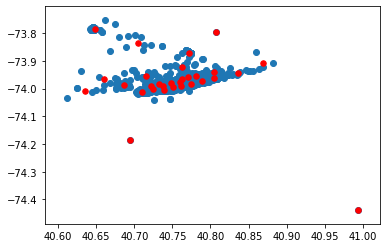

In [17]:
# task 2.2.1
kmeans = KMeans(n_clusters=30, init='k-means++', max_iter=3000, n_init=10, random_state=0)
x = np.array(np.array(list(decoded_pickup_geohash) + list(decoded_dropoff_geohash)))
kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=30, c='red')
plt.show()

In [18]:
# task 2.2.2
kmeans.labels_

array([19, 14,  6, ...,  4, 21, 28], dtype=int32)